## Practice Questions

This notebook contains practise questions for the assess coursework on the 19th of March. I will upload some model answers in a later lecture. If you can answer all of these questions, then you shouldn't have too much trouble in the coursework.

Please use the ‘litho_log’ data available in the data folder of this repository to complete these exercises.

### Exercise 1 (Approx. 10 mins)

You have been given some data that contains a large number of observations of downhole logs and the name of the lithologies associated with the log response.
 - 'DEPTH_WMSF': the depth of the measurement below seafloor 
 - 'HCGR': Total gamma ray counts 
 - 'HFK': Potassium counts 
 - 'HTHO': Thorium counts 
 - 'HURA': Uranium counts 
 - 'IDPH': Deep Phasor Dual Induction–Spherically Focused Resistivity 
 - 'IMPH': Medium Phasor Dual Induction–Spherically Focused Resistivity 
 - 'SFLU': Shallow Phasor Dual Induction–Spherically Focused Resistivity 
 - 'lithology': our target value, a string representing the name of the lithology
 
Using a Markdown cell, describe the steps that you would take to clean this data and prepare it for machine learning analysis.

### Write your answer here (in this Markdown cell)

Your answer here.

### Answer

I would do the following:

 - Remove duplicate data
 - Split data into features and target variable
     - Because our target variable uses strings, it should be encoded into numbers after splitting.
 - Create a train-test split
 - Inspect the data for unusual values
 - Drop/reassign unusual values depending on what they mean
 - Create a pipeline (or function) to train an Imputer and a Scaler to remove null values and to scale the data
 
Bonus points if you indicate which steps can be combined into functions. Also note that the order in which you clean and prepare the data is important.

### Exercise 2 (25 minutes)

Load the data set and drop any duplicates you find.

Then answer the following questions:

 - What is the distribution of the lithologies in this dataset?
 - What is the average depth of the interbedded clay and mud?
 - Among the samples found at or below 400m (below seafloor), what are the characteristics of the five samples with the highest Uranium counts?

In [36]:
import pandas as pd
import numpy as np


# Load data
data = pd.read_csv("Data/litho_log_data.csv")

# Drop duplicates
data.drop_duplicates(inplace = True)

# Check there are no duplicates remaining
print(data.duplicated().sum())

0


In [37]:
# Part 1: Use value counts to see the distribution
print(data['lithology'].value_counts())

# Part 2: Subselect Interbedded clays and muds, then find the mean of the DEPTH column
display(data[data['lithology'] == 'Interbedded clay and mud']['DEPTH_WMSF'].mean())

# Part 3: Subselect samples below 400m, sort by descending HURA, return the top 5 values
data[data['DEPTH_WMSF'] >= 400].sort_values(by = 'HURA', ascending = False).head(5)

lithology
Mud                          5406
Marl                         2619
Interbedded clay and mud     1863
Sandy Mud                    1812
Interbedded sand and mud      979
Name: count, dtype: int64


57.58818615136875

,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU,lithology
2656,432.9040,36.3385,1.1301,5.0357,5.3518,1.2467,1.1140,0.6402,Marl
2657,433.0564,40.7457,1.2416,5.7963,5.1878,1.2465,1.1150,0.6592,Marl
2659,433.3612,41.2251,1.2359,5.9830,5.0735,1.2500,1.1159,0.6541,Marl
2655,432.7516,34.8786,1.0104,5.2683,4.9194,1.2480,1.1136,0.6050,Marl
3821,783.8812,42.5650,1.0508,7.4969,4.9164,1.6550,1.4932,0.9354,Sandy Mud


### Exercise 3.1 (10 minutes)

Using the steps you outlined in Exercise 1, split this dataset into a training set and a testing set (with reasonable names). 

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Separate the data into features (X) and the target variable (y)
X = data.drop(columns = 'lithology')
y = data['lithology']

# Use as label encoder to convert the strings in the Lithology column to integers
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Remember - you will be marked based on the names chosen - please use the conventions of Python and ML
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

display(X_train, y_train)

,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU
7632,58.8988,11.0347,0.3173,1.6807,0.5729,1950.0000,1765.0116,0.0915
11425,327.2764,50.1788,1.2883,8.5476,1.9532,1.2876,1.2937,1.0533
8836,252.9040,41.1097,1.1634,6.3707,1.1412,1.1021,1.0867,0.6259
10424,161.6176,74.3161,2.0614,11.7613,1.2930,1.5396,1.2642,1.2019
3660,696.5560,48.2119,1.3284,7.6821,2.0032,1.2253,1.1575,0.7256
...,...,...,...,...,...,...,...,...
11964,419.1736,34.6981,0.8151,6.3539,1.5744,1.1573,1.1795,0.9840
5191,253.6428,62.2097,1.6736,10.1447,2.0540,1.1803,1.0450,0.6465
5390,286.8660,46.7980,1.4353,6.5992,1.2072,1.1399,0.7957,0.5089
860,135.5716,46.5403,1.3413,7.0691,1.1543,1.2768,1.0558,0.6259


array([0, 2, 3, ..., 3, 3, 0])

### Exercise 3.2 (20 minutes)

Examine the training set. Are there any missing or unusual values in any of the columns? What are these values and in which columns can they be found? Use a Markdown cell to describe your findings.

In [44]:
X_train.isna().sum()

DEPTH_WMSF    0
HCGR          6
HFK           5
HTHO          8
HURA          2
IDPH          1
IMPH          8
SFLU          3
dtype: int64

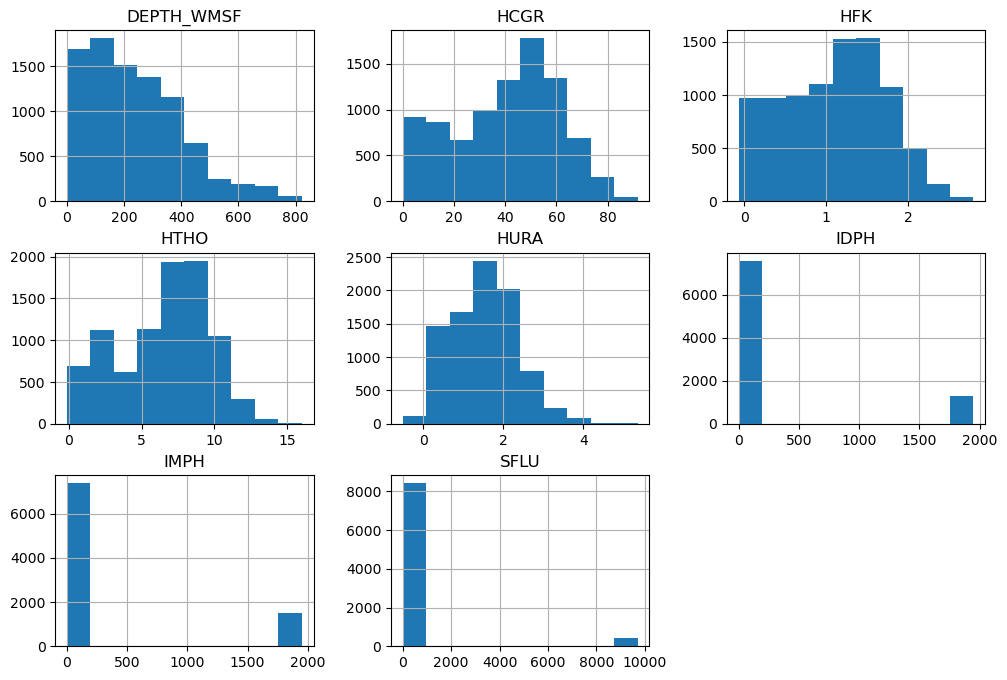

In [45]:
# Create barcharts to explore the data - there's clearly something unusual about IDPH, IMPH, and SFLU
X_train.hist(figsize = (12,8));

In [46]:
# Summary statistics
X_train[['IDPH', 'IMPH', 'SFLU']].describe()

,IDPH,IMPH,SFLU
count,8874.000000,8867.000000,8872.000000
mean,290.929236,326.102782,494.945245
std,689.628415,705.134634,2132.868259
min,0.339900,0.285100,0.091500
25%,1.198325,1.102400,0.633700
50%,1.335250,1.244200,0.752850
75%,1.966925,1.959550,1.069550
max,1950.000000,1950.000000,9700.000000


We see that there are quite a few null values in the columns of the dataset. These will need to be removed prior to analysis. Since these are continuous variables, a good strategy would be to impute the mean value of each column in place of the null values.

Looking at the bar charts of the columns in the data set, we see that IDPH, IMPH, and SFLU, have a very unusual distributions. This warrants further investigation using summary statistics. 

The summary statistics show that the maximum value of the IDPH and IMPH columns is 1950, while the maximum value of the SFLU column is 9700. However, you can see that the 75th percentile of those columns is only around 1–2. Consequently, values in these columns are likely to be referring to either missing data or invalid measurements. I would strongly consider discussing these values with the providers of this data in order to find out what exactly these values mean.

## Exercise 3.3 (10 minutes)

Replace any unusual values with `np.nan`

In [47]:
# Replace the offending values using a lambda function - any other function that does the same thing will be 
# accepted as long as the procedure is explained in sufficient detail.
X_train[['IDPH', 'IMPH']] = X_train[['IDPH', 'IMPH']].apply(lambda x: np.where(x == 1950, np.nan, x))
X_train[['SFLU']] = X_train[['SFLU']].apply(lambda x: np.where(x == 9700, np.nan, x))

# REMEMBER that you need to do this for the X_test dataset too!
X_test[['IDPH', 'IMPH']] = X_test[['IDPH', 'IMPH']].apply(lambda x: np.where(x == 1950, np.nan, x))
X_test[['SFLU']] = X_test[['SFLU']].apply(lambda x: np.where(x == 9700, np.nan, x))

## Exercise 4

In [24]:
data

,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU,lithology
0,0.0880,1.9945,0.0354,0.4317,0.0501,NaN,NaN,0.1589,Interbedded sand and mud
1,0.2404,3.4090,0.0708,0.6778,0.0352,NaN,NaN,0.1589,Interbedded sand and mud
2,0.3928,5.6734,0.1203,1.1137,0.1518,NaN,NaN,0.1589,Interbedded sand and mud
3,0.5452,9.4665,0.2242,1.7213,0.0793,NaN,NaN,0.1589,Interbedded clay and mud
4,0.6976,9.9356,0.2286,1.8462,0.4811,NaN,NaN,0.1589,Interbedded clay and mud
...,...,...,...,...,...,...,...,...,...
13003,21.1192,8.1052,0.2050,1.3974,0.2821,NaN,NaN,0.1589,Interbedded sand and mud
13004,11.3656,14.3280,0.2526,3.1132,0.0648,NaN,NaN,0.1589,Interbedded sand and mud
13006,668.6668,47.3333,1.4844,6.4872,1.6403,1.4437,1.2036,0.6174,Sandy Mud
13010,450.1252,41.8986,1.2812,5.9343,2.3948,1.1804,1.0665,0.5415,Marl
